In [1]:
from math import radians, cos, sin, asin, sqrt
import datetime
import time
import sympy 
import matplotlib.pyplot as plt

In [2]:
first_event = datetime.datetime(2017, 1 ,1, 0, 0, 0)
first_time = time.mktime(first_event.timetuple())

In [3]:
def findMin(first, last, minim):
    milliseconds = (first - last).total_seconds() * 1000.0
    if (milliseconds < minim):
        return milliseconds
    else:
        return minim

In [4]:
f = open('2017.catalog')
data = f.readlines()
counter = 0
count = 0
minimum = 100000000
points = []

epicenter = 0
lat = 0
lon = 0
for line in data:
    if (data[counter][0] != '#' and len(line) != 1  and data[counter][6] == '1' and data[counter][8] == '0' and data[counter][9] == '1'):
        split = line.split()
        magnitude = split[4]
        if (float(magnitude) > epicenter):
            epicenter = magnitude
            lat = float(split[6])
            lon = float(split[7])
            print epicenter
    counter += 1
     
print epicenter
counter = 0
        
for line in data:
    if (data[counter][0] != '#' and len(line) != 1  and data[counter][6] == '1' and data[counter][8] == '0' and data[counter][9] == '1'):
        words = line.split()
        del words[2]
        del words[2]
        del words[3]
        del words[5]
        del words[5]
        del words[5]
        del words[5]
        del words[5]
        
        #radius of the earth in km
        R = 6371 
        x = (float(words[4]) - lon) * cos( 0.5*(float(words[3])+ lat) )
        y = float(words[3]) - lat
        d = R * sqrt( x*x + y*y )
        
        del words[0]
        del words[0]
        
        if (d <= 100):
            # year, month, day, hour, minute, second, microsecond
            current = datetime.datetime(int(data[counter][0:4]), int(data[counter][6]), int(data[counter][8:10]), int(data[counter][11:13]), int(data[counter][14:16]), int(data[counter][17:19]), int(data[counter][20:22]))
            if (counter > 11):
                oneBefore = datetime.datetime(int(data[counter-1][0:4]), int(data[counter-1][6]), int(data[counter-1][8:10]), int(data[counter-1][11:13]), int(data[counter-1][14:16]), int(data[counter-1][17:19]), int(data[counter][20:22]))
                minimum = findMin(current, oneBefore, minimum)
            words.insert(0, time.mktime(current.timetuple()) - first_time)
            points.append(words)
    counter += 1
print points

1.59
1.59
[[246.0, '1.59', '32.965', '-115.558'], [296.0, '2.68', '32.980', '-115.546'], [360.0, '1.87', '32.973', '-115.549'], [373.0, '1.85', '32.966', '-115.564'], [391.0, '1.95', '32.966', '-115.557'], [432.0, '1.48', '32.971', '-115.556'], [456.0, '1.69', '32.965', '-115.546'], [505.0, '1.62', '32.961', '-115.547'], [814.0, '1.87', '32.965', '-115.544'], [1025.0, '1.85', '32.965', '-115.548'], [1028.0, '2.09', '32.969', '-115.542'], [1075.0, '1.69', '32.977', '-115.552'], [1083.0, '2.18', '32.971', '-115.549'], [1148.0, '2.35', '32.966', '-115.554'], [1224.0, '1.70', '32.968', '-115.544'], [1322.0, '2.65', '32.973', '-115.550'], [1988.0, '1.73', '32.964', '-115.553'], [2009.0, '1.69', '32.964', '-115.557'], [2110.0, '1.96', '32.963', '-115.555'], [2163.0, '1.56', '32.966', '-115.556'], [2239.0, '1.40', '32.962', '-115.557'], [2303.0, '1.34', '32.964', '-115.551'], [2329.0, '1.20', '32.968', '-115.561'], [2946.0, '0.66', '32.965', '-115.565'], [3205.0, '1.18', '32.957', '-115.564']

In [5]:
clean = []
eq_mag = []
eq_time = []
eq_loc = []
counter = 0

final_num_points = 24*60*60

for i in range(0, final_num_points):
    if (counter < len(points)):
        if (points[counter][0] == i):
            clean.append(float(points[counter][1]))
            eq_mag.append(float(points[counter][1]))
            eq_time.append(float(points[counter][0]))
            
            R = 6371 
            x = (float(points[counter][3]) - lon) * cos( 0.5*(float(points[counter][2])+ lat) )
            y = float(points[counter][2]) - lat
            d = R * sqrt( x*x + y*y )
            eq_loc.append(d)
            
            counter += 1
        else:
            clean.append(0)
    else:
        clean.append(0)

In [6]:
def runningMean(LIST, N):
    '''
    Description: A function to calculate the 'boxcar' average, (aka moving average, windowed average), of a time series
    Paramters:
        LIST: the time series data to be averaged
        N: the length of the 'boxcar', or window, that we are averaging within.
    '''
    y = np.zeros((len(LIST)-2*N,))
    for i in range(len(LIST)-2*N):
         y[i] = np.sum(LIST[i:(i+N)])
    return y/N

In [7]:
#time anaylsis

#box car clean
clean = runningMean(clean, 1000)

t = np.linspace(0,23,len(clean))
plt.plot(t, clean)
plt.xlabel('Time(hours)')
plt.ylabel('Magnitude')
plt.title('Time Analysis of January 1st Earthquakes')
plt.show()


NameError: global name 'np' is not defined

In [10]:
#frequency analysis

fs = 1
#Take the fft and normalize
Y = np.fft.fft(clean)/len(clean)

#Use only the first half of the data
Y = Y[0:len(Y)/2]

#Get the magnitude squared
mag = np.abs(Y)

#Set the x-axis
w = np.linspace(0,(fs/2.),len(Y))

#Plot it!
plt.plot(w, mag)
plt.title('Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


NameError: name 'np' is not defined

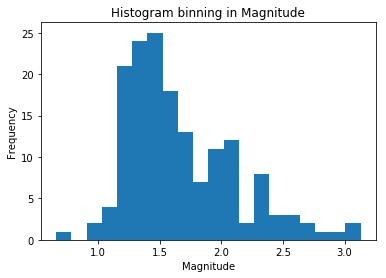

In [9]:
#histogram binning in time
plt.hist(eq_time, bins=20)
plt.xlabel('Time(seconds)')
plt.ylabel('Frequency')
plt.title('Histogram binning in Time')
plt.show()


#histogram binning in magnitude
plt.hist(eq_mag, bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram binning in Magnitude')
plt.show()

#histogram binning in location
plt.hist(eq_loc, bins=20)
plt.xlabel('Distance from the Epicenter(Lat: ' + str(lat) + ', Long: ' + str(lon) + ')')
plt.ylabel('Frequency')
plt.title('Histogram binning in Location')
plt.show()

